In [12]:
# Importing The Required Libraries
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
import time

In [13]:
x = np.load("train_X.npy")
y = np.load("train_y.npy")
data_points = len(y)
num_coeffs = 3

X = np.empty((data_points, num_coeffs))
for i in range(data_points):
    X[i][0] = 1
    X[i][1] = x[i]
    if num_coeffs > 2:
        for j in range(2, num_coeffs):
            X[i][j] = X[i][1] ** j
            
print("\nMatrix X:\n", X, "\nDimensions: ", X.shape)

print("\nMatrix Y:\n", y, "\nDimensions: ", y.shape)

# beta is the assumed weights or "our guess"
beta = np.resize(np.random.random_sample(num_coeffs), (num_coeffs, 1))
print("\nMatrix Beta:\n", beta, "\nDimensions: ", beta.shape)



Matrix X:
 [[1.         0.10410725 0.01083832]
 [1.         0.18153651 0.0329555 ]
 [1.         0.25445322 0.06474644]
 [1.         0.28091763 0.07891472]
 [1.         0.49466239 0.24469088]
 [1.         0.68755395 0.47273044]
 [1.         0.78722581 0.61972448]
 [1.         0.8003368  0.64053899]
 [1.         0.81154189 0.65860024]
 [1.         0.90581584 0.82050233]] 
Dimensions:  (10, 3)

Matrix Y:
 [[4.35563677]
 [2.2995209 ]
 [0.65876701]
 [0.30353384]
 [1.20143598]
 [0.89299913]
 [0.97211317]
 [2.1784989 ]
 [2.88926338]
 [4.11973874]] 
Dimensions:  (10, 1)

Matrix Beta:
 [[0.33451133]
 [0.39754738]
 [0.97809296]] 
Dimensions:  (3, 1)


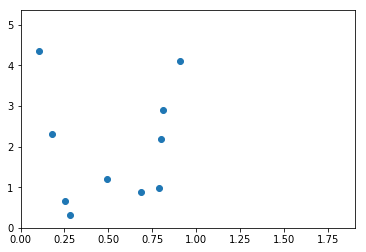

In [14]:
plt.axis([0, np.amax(X[:, 1]) + 1, 0, np.amax(y) + 1])
plt.scatter(X[:, 1], y)
plt.show()

In [15]:
def cost_function(X, y, beta):
    # number of training examples
    m = len(y)

    # Calculate the cost with the given parameters
    J = np.sum((X.dot(beta) - y) ** 2) / (2 * m)

    return J

cost_function(X, y, beta)

1.4897242702072313

<Figure size 432x288 with 0 Axes>

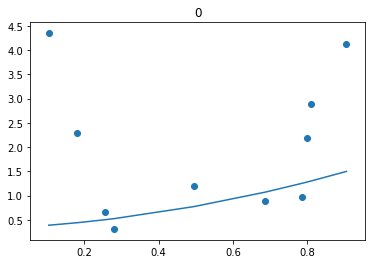

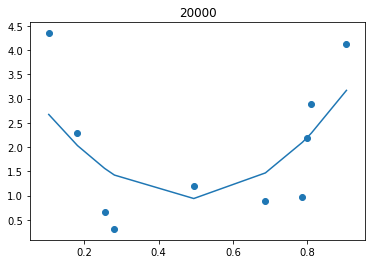

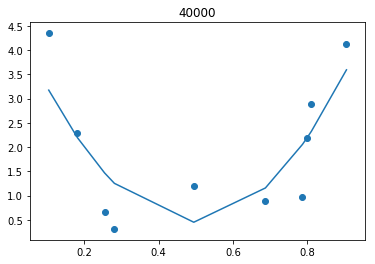

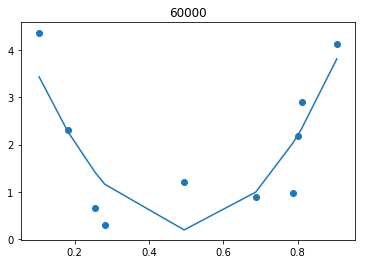

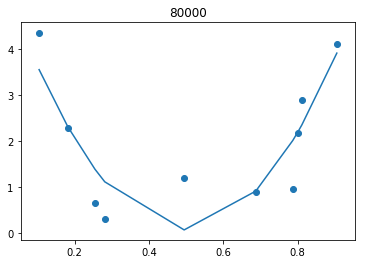

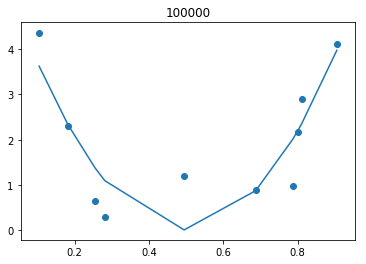

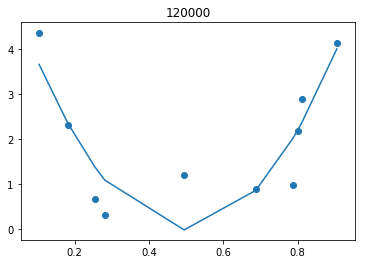

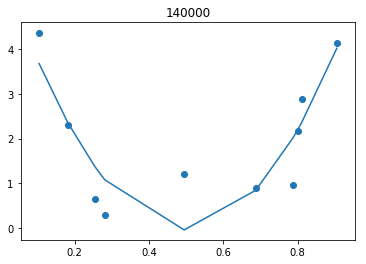

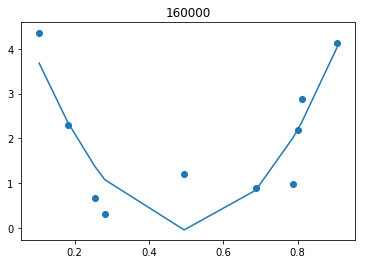

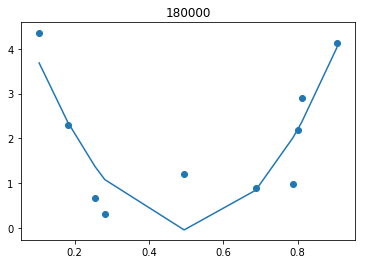

[[  5.9330611 ]
 [-24.11321792]
 [ 24.29516045]]
200000


In [22]:
# beta = np.load("weights.npy")
# Try changing the number of iterations until you find how long it takes to overfit
iterations = 200000
# Then for the same number of iterations, increase and decrease alpha by atleast 10 times and see what happens 
alpha = 0.03
cost_history = [0] * iterations

def gradient_descent(X, y, beta, alpha, iterations):
    plt.figure()
    plt.show()
    m = len(y)
    
    for iteration in range(iterations):
        # Predictions / Hypothesis is X * beta (assumed weights)
        predictions = X.dot(beta)
        
        # Loss  = Our prediction -  real values
        loss = predictions - y
        
        """
        X transpose shape = (3, 15)
        loss shape = (15, 1)
        X tranpose * loss = (3, 1) which is the same shape as beta
        Gradient / Slope = X tranpose * Y
        """
        gradient = X.T.dot(loss) / m
        beta = beta - alpha * gradient
        
        # We calculate cost for analysis purposes 
        cost = cost_function(X, y, beta)
        cost_history[iteration] = cost
        
        # Below code is for plotting purposes
        if iteration % 20000 == 0:
            plt.title(iteration)
            plt.scatter(X[:, 1], y)
            plt.plot(X[:, 1], predictions)
            plt.draw()
            plt.show()
            # time.sleep(0.5)
            plt.close()
        cost_history[iteration] = cost
    return beta

weights = gradient_descent(X, y, beta, alpha, iterations)
np.save("weights", weights)
print(weights)
print(len(cost_history))


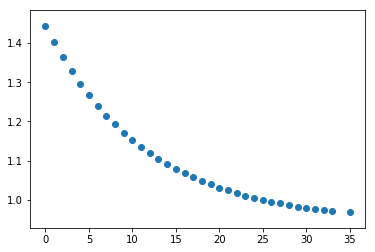

In [23]:
cost_range = 35
indexes = np.linspace(0, cost_range, cost_range, dtype='int')
plt.scatter(indexes, cost_history[:cost_range])
plt.show()

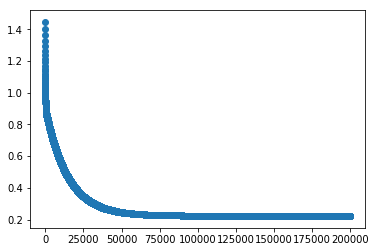

In [24]:
indexes = np.linspace(0, iterations, iterations, dtype='int')
plt.scatter(indexes, cost_history[:iterations])
plt.show()

In [25]:
cost_history[-1]

0.22396692394945247